# Машинное обучение (семинары)


## Урок 2. Регрессия на практике

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.
- цена продажи (SalePrice, зависимая переменная),
- наземная жилая зона (GrLivArea),
- общее качество (Overall Quality),
- территория гаража (GarageArea),
- условия сделки (SaleCondition).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [7]:
# Загрузка необходимых библиотек и модулей:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

Файл с данными находится по ссылке: "https://gbcdn.mrgcdn.ru/uploads/asset/6057149/attachment/dcab3617fbc87c12cb7c8aa32e38c163.csv"

In [8]:
# Загрузка данных в датафрейм
df = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/6057149/attachment/dcab3617fbc87c12cb7c8aa32e38c163.csv')
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Пропуски отсутствуют. Столбец SaleCondition - не числовой.

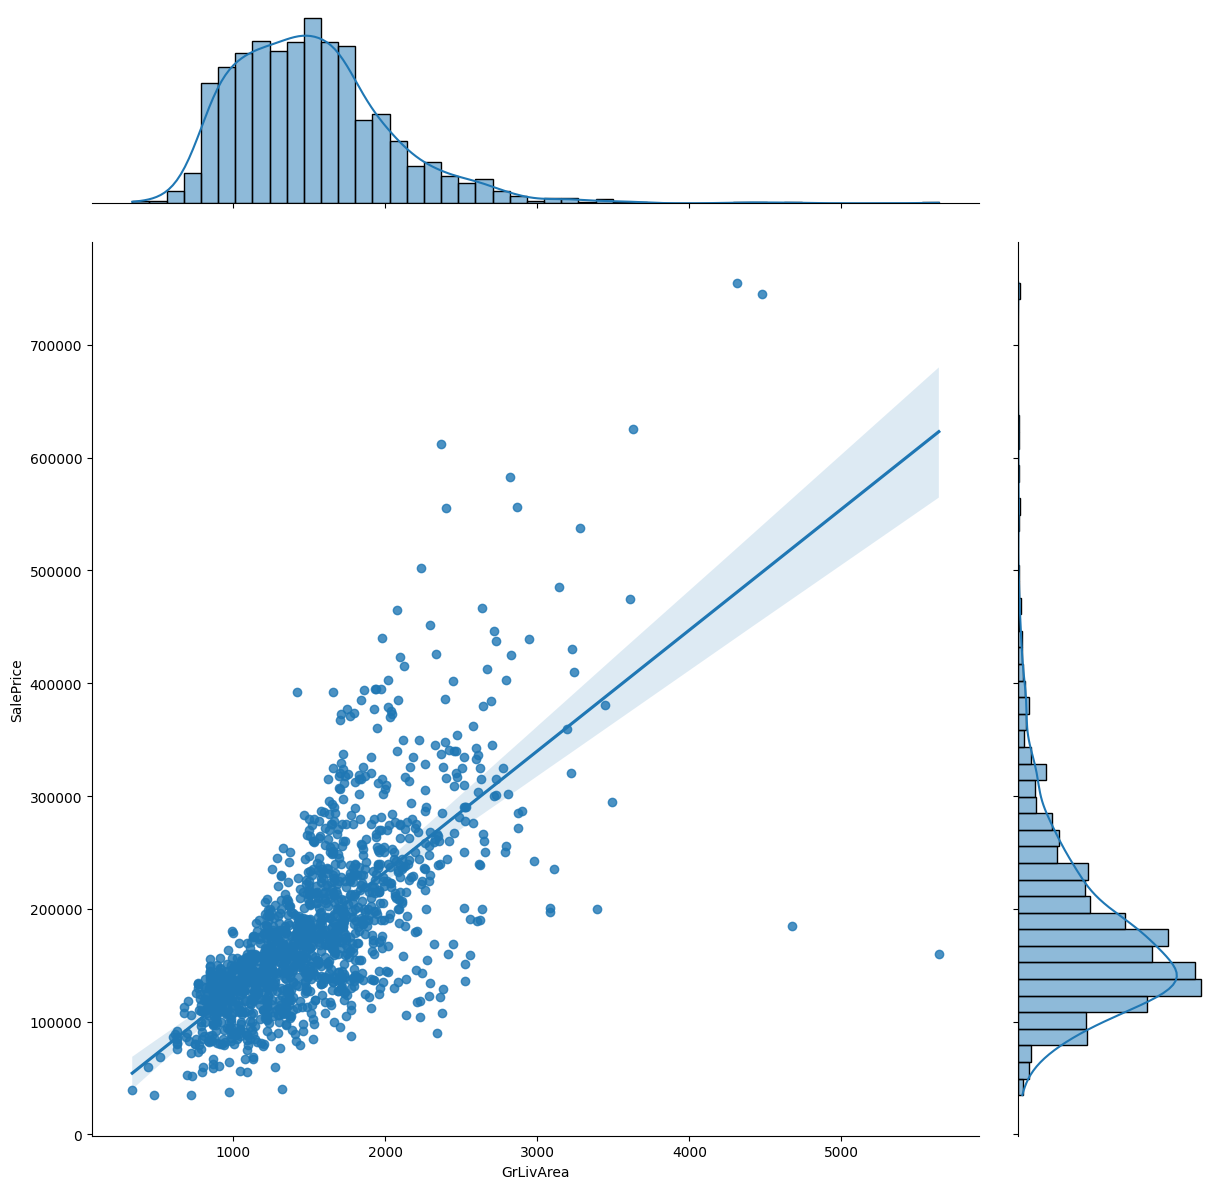

In [10]:
# Зависимость цены от жилой зоны
sns.jointplot(data=df, x='GrLivArea', y='SalePrice', kind="reg", height=12, ratio=4);

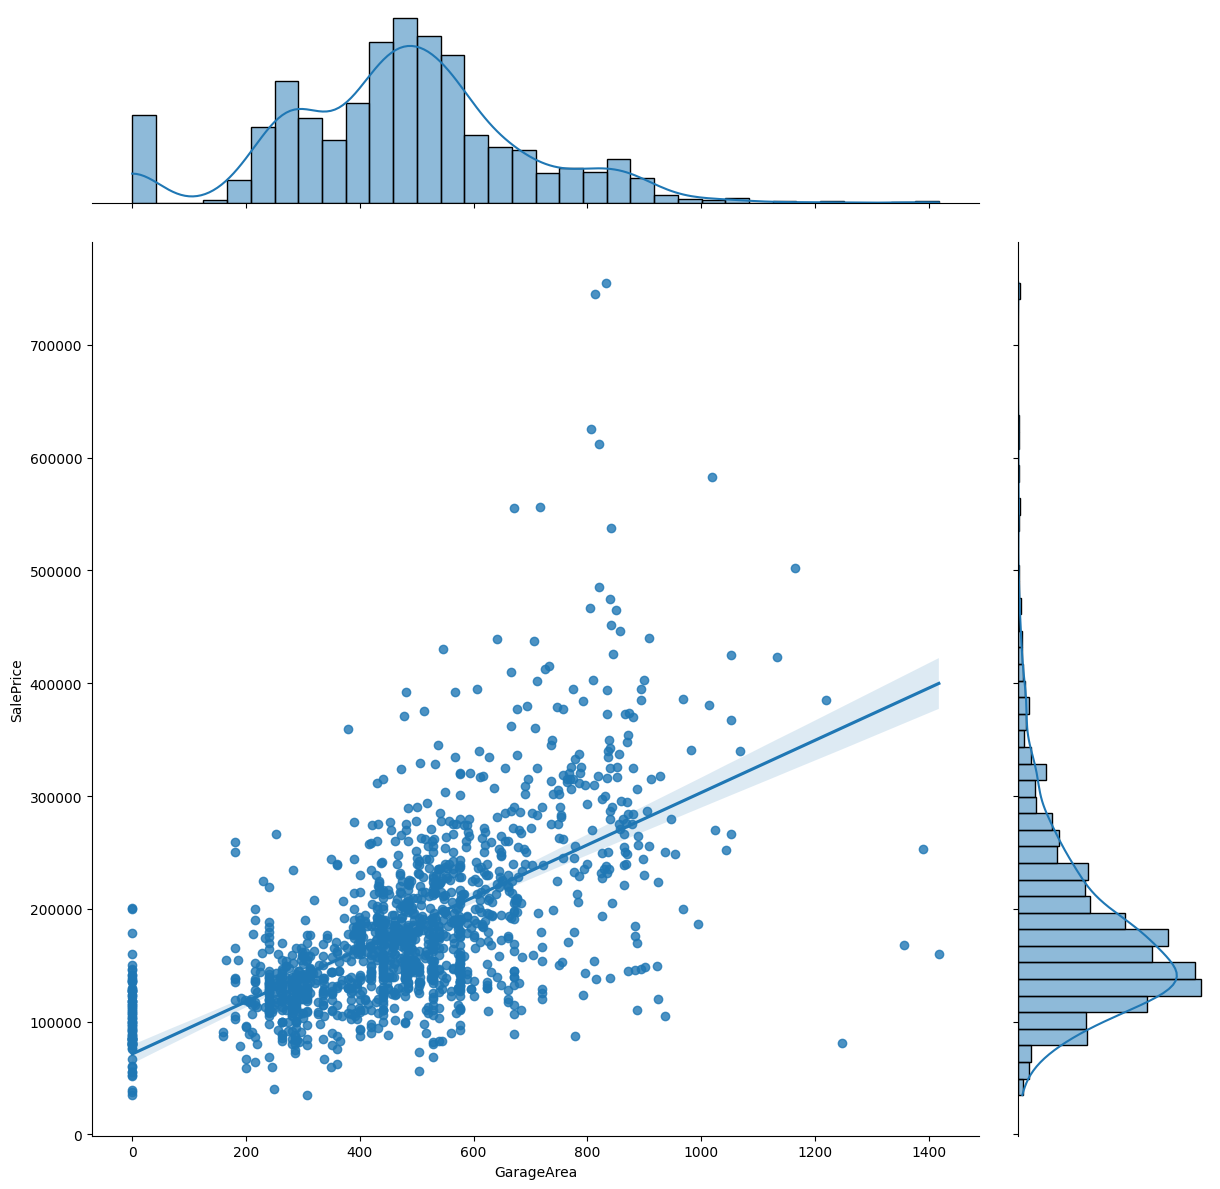

In [11]:
# Зависимость цены от площади гаража
sns.jointplot(data=df, x='GarageArea', y='SalePrice', kind="reg", height=12, ratio=4);

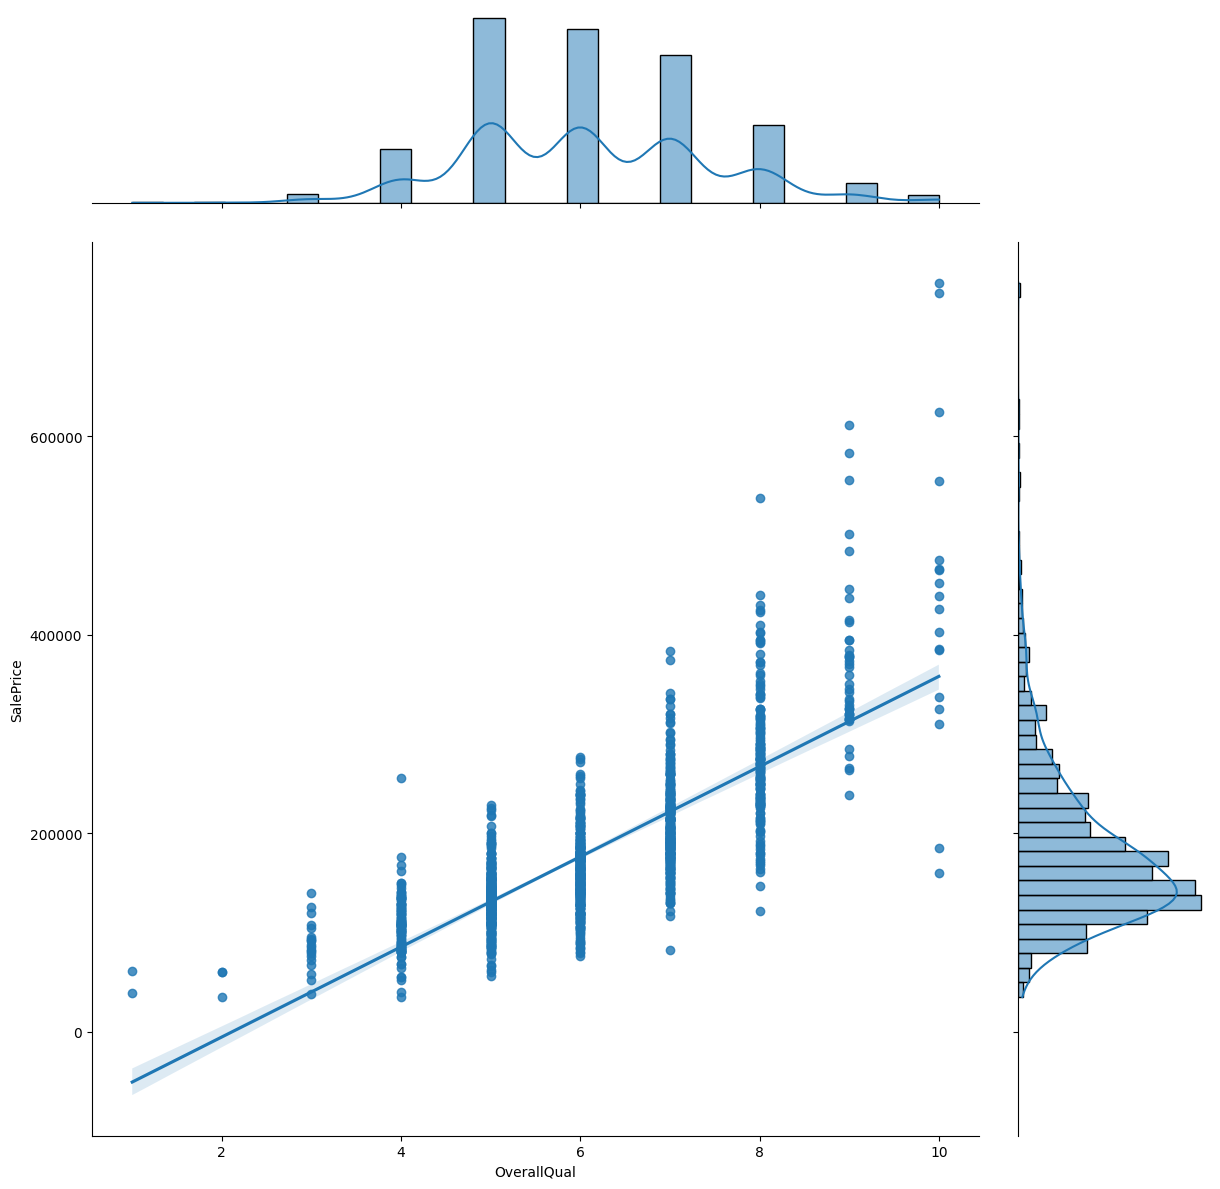

In [12]:
# Зависимость цены от общего качества
sns.jointplot(data=df, x='OverallQual', y='SalePrice', kind="reg", height=12, ratio=4);

В идеале нужно бы избавиться от выбросов. Но в задачу не входит подготовка данных.

Разделим датасет на обучающую и тестовую выборки.

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

Построение модели

In [14]:
model = LinearRegression()
model.fit(train[['GrLivArea', 'OverallQual', 'GarageArea']], train['SalePrice'])



LinearRegression()

In [15]:
# Параметры модели
print("Коэффициенты модели:", model.coef_)
print("Свободный член модели:", model.intercept_)

Коэффициенты модели: [   45.95438225 27772.56853787    74.79602669]
Свободный член модели: -94384.52384295783


In [ ]:
# Результаты предсказаний на обучающей и тестовой выборках
y_predict_train = model.predict(train[['GrLivArea', 'OverallQual', 'GarageArea']])
y_predict_test = model.predict(test[['GrLivArea', 'OverallQual', 'GarageArea']])

Оценка качества модели

In [ ]:
# Обучающая выборка
train_mae = mean_absolute_error(train['SalePrice'], y_predict_train)
train_mse = mean_squared_error(train['SalePrice'], y_predict_train)
print("MAE на обучающей выборке:", train_mae)
print("MSE на обучающей выборке:", train_mse)

MAE на обучающей выборке: 26695.56507243098
MSE на обучающей выборке: 1606217852.3585093


In [ ]:
# Тестовая выборка
test_mae = mean_absolute_error(test['SalePrice'], y_predict_test)
test_mse = mean_squared_error(test['SalePrice'], y_predict_test)
print("MAE на тестовой выборке:", test_mae)
print("MSE на тестовой выборке:", test_mse)

MAE на тестовой выборке: 27163.188000430473
MSE на тестовой выборке: 1813348452.946009


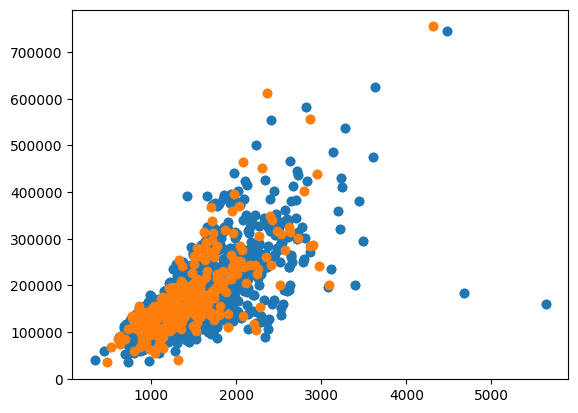

In [ ]:
plt.scatter(train['GrLivArea'], train['SalePrice'], label='Обучающая выборка')
plt.scatter(test['GrLivArea'], test['SalePrice'], label='Тестовая выборка')

## ВЫВОД

Полученные оценки качества модели имеют довольно большие значения, но тем не менее, учитывая, что реальные значения целевой переменной исчисляются сотнями тысяч, можно сказать, что не такие уж и критически большие величины ошибок мы получили.

Датасет имеет не так уж много строк (1460), что в итоге и отразилось на величине ошибки.